In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [5]:
print(train_df.shape)
print(test_df.shape)

(10683, 11)
(2671, 10)


In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   D

In [7]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [8]:
total_df = train_df.append(test_df, sort=False)

In [9]:
total_df.shape

(13354, 11)

In [11]:
total_df.to_csv('Flight_train.csv')

In [10]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
total_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [15]:
total_df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [16]:
total_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [75]:
total_df[['Date','Month','Year']] = total_df.Date_of_Journey.str.split('/', expand=True)

In [76]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [77]:
total_df[['Date','Month','Year']] = total_df[['Date','Month','Year']].astype(int)

In [78]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [79]:
total_df.drop('Date_of_Journey', axis=1, inplace=True)

In [80]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [81]:
total_df['Arrival_Time'] = total_df['Arrival_Time'].str.split(' ').str[0]

In [82]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [83]:
total_df.groupby(['Total_Stops']).count()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year
Total_Stops,,,,,,,,,,,,
1 stop,7056,7056,7056,7056,7056,7056,7056,7056,5625,7056,7056,7056
2 stops,1899,1899,1899,1899,1899,1899,1899,1899,1520,1899,1899,1899
3 stops,56,56,56,56,56,56,56,56,45,56,56,56
4 stops,2,2,2,2,2,2,2,2,1,2,2,2
non-stop,4340,4340,4340,4340,4340,4340,4340,4340,3491,4340,4340,4340


In [84]:
total_df[total_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [85]:
total_df['Total_Stops'].fillna('1 stop', inplace=True)

In [86]:
total_df[total_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year


In [87]:
total_df['Total_Stops'].isna().sum()

0

In [88]:
total_df['Total_Stops'].replace('non-stop', '0 stop', inplace=True)

In [89]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [90]:
total_df['Stops'] = total_df['Total_Stops'].str.split(' ').str[0]

In [92]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [96]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops               object
dtype: object

In [97]:
total_df['Stops'] = total_df['Stops'].astype(int)

In [98]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
dtype: object

In [99]:
total_df.drop('Total_Stops', axis=1, inplace=True)

In [100]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [101]:
total_df[['Arrival_Hour', 'Arrival_Minute']] = total_df.Arrival_Time.str.split(':', expand=True)

In [102]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [103]:
total_df['Arrival_Hour'] = total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute'] = total_df['Arrival_Minute'].astype(int)
total_df.drop('Arrival_Time', axis=1, inplace=True)

In [108]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_Hour         int32
Arrival_Minute       int32
dtype: object

In [109]:
total_df[['Dep_Hour', 'Dep_Minute']] = total_df.Dep_Time.str.split(':', expand=True) 

In [110]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour            object
Dep_Minute          object
dtype: object

In [111]:
total_df['Dep_Hour'] = total_df['Dep_Hour'].astype(int)
total_df['Dep_Minute'] = total_df['Dep_Minute'].astype(int)
total_df.drop('Dep_Time', axis=1, inplace=True)

In [112]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour             int32
Dep_Minute           int32
dtype: object

In [113]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,10,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,15,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,25,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,30,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,35,35,16,50


In [114]:
df = total_df.copy()

In [121]:
total_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [128]:
total_df['Route_1'] = total_df['Route'].str.split('→ ').str[0]
total_df['Route_2'] = total_df['Route'].str.split('→ ').str[1]
total_df['Route_3'] = total_df['Route'].str.split('→ ').str[2]
total_df['Route_4'] = total_df['Route'].str.split('→ ').str[3]
total_df['Route_5'] = total_df['Route'].str.split('→ ').str[4]

In [129]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,10,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,15,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,25,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,30,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,35,35,16,50,BLR,NAG,DEL,NaN,NaN


In [134]:
total_df['Route_1'].fillna('None', inplace=True)
total_df['Route_2'].fillna('None', inplace=True)
total_df['Route_3'].fillna('None', inplace=True)
total_df['Route_4'].fillna('None', inplace=True)
total_df['Route_5'].fillna('None', inplace=True)

In [132]:
total_df.drop(['Route','Duration'], axis=1, inplace=True)

In [135]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,10,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,15,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,25,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,30,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,35,35,16,50,BLR,NAG,DEL,None,None


In [136]:
total_df.isna().sum()

Airline               0
Source                0
Destination           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Stops                 0
Arrival_Hour          0
Arrival_Minute        0
Dep_Hour              0
Dep_Minute            0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [137]:
total_df['Price'].fillna((total_df['Price'].mean()), inplace=True)

In [138]:
total_df.isna().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stops              0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [139]:
total_df.tail()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,1,25,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,0,55,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,1,25,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,1,15,15,4,0,DEL,BOM,COK,None,None
2670,Multiple carriers,Delhi,Cochin,No info,9087.064121,15,6,2019,1,15,15,4,55,DEL,BOM,COK,None,None


In [140]:
total_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [141]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
total_df['Airline'] = encoder.fit_transform(total_df['Airline'])
total_df['Source'] = encoder.fit_transform(total_df['Source'])
total_df['Destination'] = encoder.fit_transform(total_df['Destination'])
total_df['Additional_Info'] = encoder.fit_transform(total_df['Additional_Info'])
total_df['Route_1'] = encoder.fit_transform(total_df['Route_1'])
total_df['Route_2'] = encoder.fit_transform(total_df['Route_2'])
total_df['Route_3'] = encoder.fit_transform(total_df['Route_3'])
total_df['Route_4'] = encoder.fit_transform(total_df['Route_4'])
total_df['Route_5'] = encoder.fit_transform(total_df['Route_5'])

In [142]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,10,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,15,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,25,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,30,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,35,35,16,50,0,34,8,12,4


## Feature Selection

In [152]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [153]:
df_train = total_df[0:10683]
df_test = total_df[10683:]

In [2]:
df_test.head()

NameError: name 'df_test' is not defined

In [154]:
x = df_train.drop(['Price'], axis=1)
y = df_train.Price

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [159]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

In [156]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [157]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [158]:
x_train.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
7106,8,0,2,8,6,4,2019,0,35,35,5,55,0,13,24,12,4
7904,1,2,1,8,1,6,2019,1,50,50,5,15,3,41,6,12,4
4861,4,2,1,5,12,6,2019,2,35,35,14,35,3,34,4,5,4
9375,3,2,1,8,15,6,2019,1,0,0,6,40,3,7,6,12,4
155,1,3,0,8,9,5,2019,2,55,55,8,20,2,28,4,3,4


In [160]:
selected_features = x_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Dep_Hour', 'Dep_Minute', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [161]:
x_train = x_train.drop(['Year', 'Arrival_Minute'],axis=1)

In [162]:
x_test = x_test.drop(['Year', 'Arrival_Minute'], axis=1)

In [163]:
x_train.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
7106,8,0,2,8,6,4,0,35,5,55,0,13,24,12,4
7904,1,2,1,8,1,6,1,50,5,15,3,41,6,12,4
4861,4,2,1,5,12,6,2,35,14,35,3,34,4,5,4
9375,3,2,1,8,15,6,1,0,6,40,3,7,6,12,4
155,1,3,0,8,9,5,2,55,8,20,2,28,4,3,4


## Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [175]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [190]:
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

0.9795621620320534
0.8584567570417609


In [177]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y, cv=5)

In [178]:
score.mean()

0.8836989839550711

In [179]:
pred = regressor.predict(x_test)

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


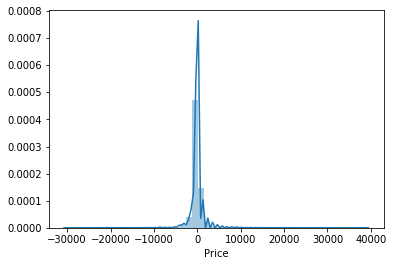

In [180]:
import seaborn as sns
sns.distplot(y_test-pred)

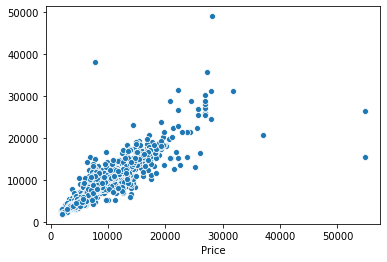

In [181]:
sns.scatterplot(y_test, pred)

## Hyper parameter tuning

In [167]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"n_estimators":[int(x) for x in np.linspace(start=100, stop=1200, num=12)],
             "max_features":['auto', 'sqrt'],
             "max_depth":[int(x) for x in np.linspace(5,30,6)],
             "min_samples_split":[2,5,10,15,100],
             "min_samples_leaf":[1,2,5,10]}
param_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [170]:
rf_random = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=50, cv=5, verbose=3, random_state=42, n_jobs=1)

In [171]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-10238388.597, total=   1.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-9434096.367, total=   1.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-6091582.304, total=   1.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-7796488.219, total=   1.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-7983694.057, total=   1.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-2567012.119, total=   4.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_featu

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, score=-3426889.011, total=   7.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, score=-3243180.055, total=   8.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-6993291.289, total=   4.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-6634847.822, total=   5.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-4139060.431, total=   2.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-4662607.319, total=   1.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-5139667.110, total=   1.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-3080567.570, total=   1.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3723737.463, total=   7.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-4067315.903, total=   7.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-2248882.566, total=   7.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3250855.440, total=   7.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_featur

[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-7523651.208, total=   3.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-4227841.773, total=   3.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-5915867.942, total=   3.2s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-5918684.731, total=   3.2s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=100, min_samples_l

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-2664221.191, total=   5.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-3942554.705, total=   5.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-3835244.799, total=   5.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-7594168.347, total=   4.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-4692629.807, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-4759100.829, total=   5.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-6785200.617, total=   1.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-6339602.379, total=   1.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, m

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 23.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [172]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [173]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [182]:
predicted = rf_random.predict(x_test)

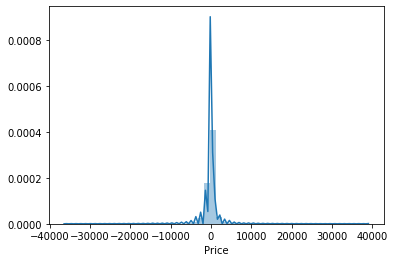

In [185]:
sns.distplot(y_test-predicted)

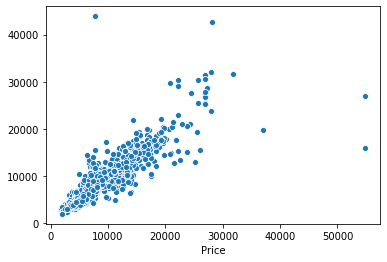

In [186]:
sns.scatterplot(y_test, predicted)

In [188]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 699.0208071255231
MSE: 2867163.700762031
RMSE: 1693.2701204362024


In [189]:
print('MAE :', metrics.mean_absolute_error(y_test,predicted))
print('MSE:', metrics.mean_squared_error(y_test,predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predicted)))

MAE : 699.9852686482185
MSE: 2867095.0826834277
RMSE: 1693.2498583148997


In [191]:
import pickle
file = open('randomForestRegressorFlightPricePrediction.pkl', 'wb')
pickle.dump(rf_random, file)